# Non Linear Regressions: Logistic Regression


Most of the content of this notebook is from

Bruce Shapiro

Source code listings for Scientific Computation Python Hacking for Math Junkies

http://www.calculuscastle.com/pythonbook.html

Chapter 38

In [1]:
import numpy
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

## Data Set

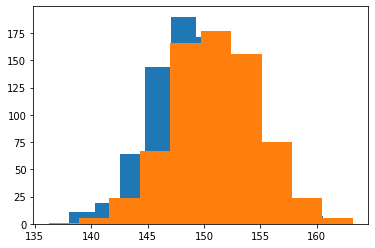

In [2]:
boys  = np.random.normal(149.0488164,  3.7468166, 800)
girls = np.random.normal(151.19132534, 3.7468166, 700)

plt.hist(boys)
plt.hist(girls)
plt.show()

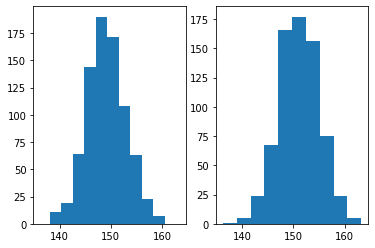

In [3]:
fig,(axleft,axright) = plt.subplots(nrows=1,ncols=2, sharex=True)
axleft.hist(boys)
axright.hist(girls)
plt.show()

In [4]:
b = [[x, 0] for x in boys]  # we write, boys  in column 1 and 0 column 2
g = [[x, 1] for x in girls] # we write, girls in column 1 and 0 column 2

print (b[:4])
print (len(b))
print (g[:4])
print (len(g))

bg        = np.array(b + g)
print (len(bg))
print (bg[0:2,0])
print (bg[0:2,1])

heights   = bg[:,0]
zerosones = bg[:,1]

print (bg[:4])
print (heights[:4])
print (zerosones[:4])

[[149.53145435872437, 0], [149.31218956834567, 0], [149.94735793127043, 0], [151.21801955969377, 0]]
800
[[146.06797452237694, 1], [158.47343644798514, 1], [147.8601398700248, 1], [150.24611522922777, 1]]
700
1500
[149.53145436 149.31218957]
[0. 0.]
[[149.53145436   0.        ]
 [149.31218957   0.        ]
 [149.94735793   0.        ]
 [151.21801956   0.        ]]
[149.53145436 149.31218957 149.94735793 151.21801956]
[0. 0. 0. 0.]


In [5]:
print (bg)
print (bg[0,0])
print (bg[0,1])

[[149.53145436   0.        ]
 [149.31218957   0.        ]
 [149.94735793   0.        ]
 ...
 [150.67364968   1.        ]
 [152.86359949   1.        ]
 [155.69557262   1.        ]]
149.53145435872437
0.0


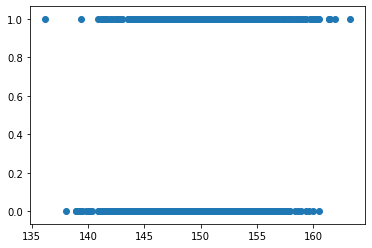

In [6]:
%matplotlib inline
plt.scatter(heights, zerosones)
plt.show()

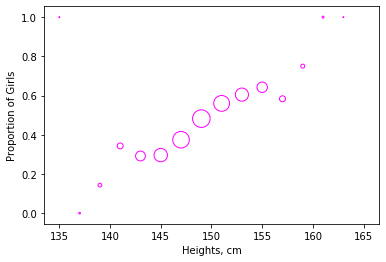

In [7]:
def bindata(xdata, zerosones, m, M, nbins):
    Delta   = float(M-m);
    N       = nbins + 1
    binmins = np.linspace(m,M,N)
    zeros, ones = N*[0], N*[0]
    binvals = [int(nbins*(x-m)/Delta) for x in xdata]
    for flag, b in zip(zerosones, binvals):
        if flag > 0:
            ones[b]  +=1
        else:
            zeros[b] +=1
    sizes = [x + y for x,y in zip(ones, zeros)]
    proportions = [float(x)/float(y) if y > 0 else 0 for x,y in zip(ones, sizes)]
    return (binmins, proportions, sizes)

xv, yv, sv = bindata(heights,zerosones, 135, 165, 15)
%matplotlib inline
plt.scatter(xv, yv, s = sv, c = "white", edgecolor = "magenta")
plt.xlabel("Heights, cm")
plt.ylabel("Proportion of Girls")
plt.show()     

## logistic regression with sklearn.linear_model

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
m = min(heights)
y = np.array(zerosones)
X = np.array([[x-m] for x in heights])
print (min(heights))
print (max(heights))

136.22681777246552
163.2047734207287


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
R2 = LR.score(x_test, y_test)
a  = LR.coef_[0][0]
b  = LR.intercept_[0]
print ("R^2= ", R2, "a=", a, "b= ", b)

print (" ---------------------------------- ")
print (LR.coef_[0])
print (LR.coef_[0][0])
print (LR.intercept_)
print (LR.intercept_[0])


R^2=  0.632 a= 0.11281396094709863 b=  -1.6753273305288658
 ---------------------------------- 
[0.11281396]
0.11281396094709863
[-1.67532733]
-1.6753273305288658


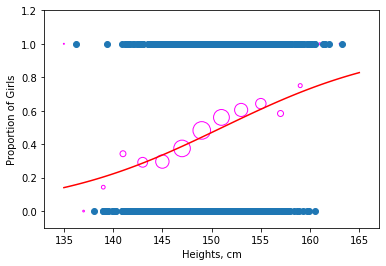

In [11]:
from math import e
def flog(x, a, b):
    z = a*x + b
    return 1.0/(1.0+e**(-z))

xvals = np.linspace(135, 165, 100)
yvals = [flog(x-m, a, b) for x in xvals]

%matplotlib inline
plt.scatter(xv, yv, s = sv, c = "white", edgecolor = "magenta")
plt.scatter(heights, zerosones)
plt.xlabel("Heights, cm")
plt.ylabel("Proportion of Girls")
plt.xlim(133, 167)
plt.ylim(-0.1, 1.2)
plt.plot(xvals, yvals, c="red")
plt.show()

## Confusion matrix with sklearn 

In [12]:
# High precision relates to a low false positive rate, 
# and high recall relates to a low false negative rate. 
# High scores for both show that the classifier is returning accurate results (high precision), 
# as well as returning a majority of all positive results (high recall).

# A system with high recall but low precision returns many results, but most of its predicted labels 
# are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite,
# returning very few results, but most of its predicted labels are correct when compared to the training labels. 
# An ideal system with high precision and high recall will return many results, with all results labeled correctly.

from sklearn import metrics
predictions = LR.predict(x_test)
print (metrics.classification_report(y_test, predictions))
confusionMatrix = metrics.confusion_matrix(y_test, predictions)

print (" ----------- ")
print (confusionMatrix)

m00 = confusionMatrix[0][0] / float(confusionMatrix[0][0] + confusionMatrix[1][0])
m10 = confusionMatrix[1][1] / float(confusionMatrix[0][1] + confusionMatrix[1][1])
m01 = confusionMatrix[0][0] / float(confusionMatrix[0][0] + confusionMatrix[0][1])
m11 = confusionMatrix[1][1] / float(confusionMatrix[1][0] + confusionMatrix[1][1])
print (" ")
print (" - My test - ")
domarr = np.array([[m00, m01],[m10, m11]])
print (domarr)

print (" ---------------------- ")
print (m01)
print (confusionMatrix[0][0] )
print (confusionMatrix[0][0] )
print (confusionMatrix[0][1])

             precision    recall  f1-score   support

        0.0       0.64      0.74      0.69       204
        1.0       0.62      0.50      0.55       171

avg / total       0.63      0.63      0.63       375

 ----------- 
[[151  53]
 [ 85  86]]
 
 - My test - 
[[0.63983051 0.74019608]
 [0.61870504 0.50292398]]
 ---------------------- 
0.7401960784313726
151
151
53


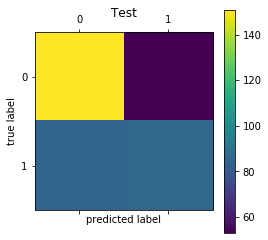

In [13]:
plt.matshow(confusionMatrix)
plt.title("Test")
plt.colorbar(); plt.ylabel("true label"); plt.xlabel("predicted label")
plt.show()

## logistic regression with statsmodels.api

In [14]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [15]:
import statsmodels.api as sm

# unlike when using logistic regression with sklearn.linear_model,
# when using logistic regression with stasmodels, one has to add 1's into the matrix X

YVALS   = np.array([u for u in zerosones])      # the zeros and ones = Ys
XVALS   = np.array([[1, u-m] for u in heights]) # the matrix X - 1 and Heights (less m)

model   = sm.Logit(YVALS, XVALS)
results = model.fit(method="bfgs")

print (" ----------------------------------- ")
print (" logistic regression with stasmodels ")
print (results.summary())
print (" ----------------------------------- ")

print (" ----------------------------------- ")
print (" logistic regression with sklearn.linear_model ")
print ("R^2= ", R2, " -- ", "a (constant) =", a, " -- ", "b (Beta) = ", b)
print (" ----------------------------------- ")

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.660327
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
 ----------------------------------- 
 logistic regression with stasmodels 
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jan 2020   Pseudo R-squ.:                 0.04428
Time:                        11:20:16   Log-Likelihood:                -990.49
converged:                       True   LL-Null:                       -1036.4
                                        LLR p-value:                 9.645e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [16]:
# in this case, the test data set size is 0 !, all data is used to fitting!!
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0)
LR = LogisticRegression()
LR.fit(x_train, y_train)
a  = LR.coef_[0][0]
b  = LR.intercept_[0]
print ("a-Constant ", a, "b-beta = ", b)

a-Constant  0.12549971201439103 b-beta =  -1.8665165947236955
